In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import copy


from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/AOSc111/project/extended_data_v2.csv'
energy = pd.read_csv(filepath)
display(energy)

Mounted at /content/drive


,datetime,Up,Down,sp,cloud_amount,wind_speed,precipitation_amount,pressure,air_temperature,relative_humidity,wind_direction,Down_Cap,Up_Cap,is_public_holiday,electricity_consumption,electricity_consumption_Finnish_networks,electricity_consumption_forecast
0,2024-06-20 22:00:00+00:00,33.928959,-30.733325,-2.00,1.811111,2.353333,0.0,1006.774444,11.573333,84.877778,249.433333,23.82,9.80,1,25735.780,3617520.070,26816.500
1,2024-06-20 23:00:00+00:00,29.836211,-31.185171,-2.43,1.811111,2.311111,0.0,1006.784444,10.880000,86.966667,246.788889,0.00,0.00,1,25082.630,3447580.368,26178.800
2,2024-06-21 00:00:00+00:00,25.743463,-26.234159,-5.01,1.566667,2.248889,0.0,1006.781111,10.563333,86.144444,253.977778,0.00,0.00,1,24950.970,3328815.372,25513.200
3,2024-06-21 01:00:00+00:00,21.650715,-21.283147,-6.58,2.133333,2.278889,0.0,1006.750000,10.505556,85.588889,242.055556,0.00,0.00,1,24850.310,3248613.632,25324.400
4,2024-06-21 02:00:00+00:00,17.557967,-16.332135,-2.51,3.111111,2.356667,0.0,1006.848889,11.137778,84.488889,253.366667,0.00,0.00,1,25193.840,3265733.750,25520.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,2025-03-16 18:00:00+00:00,39.073334,4.782500,23.37,3.238095,3.390476,0.0,1012.841670,-3.635714,62.571429,332.523810,16.31,16.97,0,11484.700,7296682.273,11027.150
6452,2025-03-16 19:00:00+00:00,19.260000,3.527500,12.02,1.535714,3.109524,0.0,1013.817865,-4.528571,66.202380,323.238096,19.59,16.50,0,11365.950,7029746.942,11098.625
6453,2025-03-16 20:00:00+00:00,58.475002,-7.927500,11.63,0.809524,3.204762,0.0,1014.696421,-5.182143,68.107143,318.952379,19.59,15.50,0,11691.425,7193390.865,11268.650
6454,2025-03-16 21:00:00+00:00,58.475002,7.487500,11.21,0.154762,3.227381,0.0,1015.419056,-5.679762,68.107142,326.892860,16.31,14.50,0,11432.875,7051441.877,11157.975


array([[<Axes: title={'center': 'Up'}>]], dtype=object)

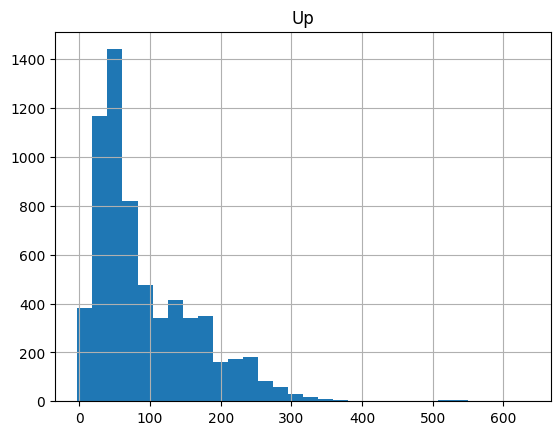

In [2]:
energy.hist('Up',bins = 30)

In [3]:
selected_energy = ['Up', 'sp', 'cloud_amount', 'wind_speed', 'precipitation_amount', 'pressure', 'air_temperature', 'relative_humidity', 'wind_direction', 'is_public_holiday', 'electricity_consumption', 'electricity_consumption_Finnish_networks']
energy_subset = energy[selected_energy].copy()
energy_subset['log_Up'] = np.log10(energy_subset['Up']+3.74)
energy_subset = energy_subset.drop('Up', axis=1)
display(energy_subset.head())

,sp,cloud_amount,wind_speed,precipitation_amount,pressure,air_temperature,relative_humidity,wind_direction,is_public_holiday,electricity_consumption,electricity_consumption_Finnish_networks,log_Up
0,-2.00,1.811111,2.353333,0.0,1006.774444,11.573333,84.877778,249.433333,1,25735.78,3617520.070,1.575984
1,-2.43,1.811111,2.311111,0.0,1006.784444,10.880000,86.966667,246.788889,1,25082.63,3447580.368,1.526032
2,-5.01,1.566667,2.248889,0.0,1006.781111,10.563333,86.144444,253.977778,1,24950.97,3328815.372,1.469578
3,-6.58,2.133333,2.278889,0.0,1006.750000,10.505556,85.588889,242.055556,1,24850.31,3248613.632,1.404675
4,-2.51,3.111111,2.356667,0.0,1006.848889,11.137778,84.488889,253.366667,1,25193.84,3265733.750,1.328338


In [4]:
X_data=energy_subset.drop(['log_Up'],axis=1).values

y_data=energy_subset['log_Up'].values
y_data = y_data.reshape(-1,1)

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state=42)

array([[<Axes: title={'center': 'log_Up'}>]], dtype=object)

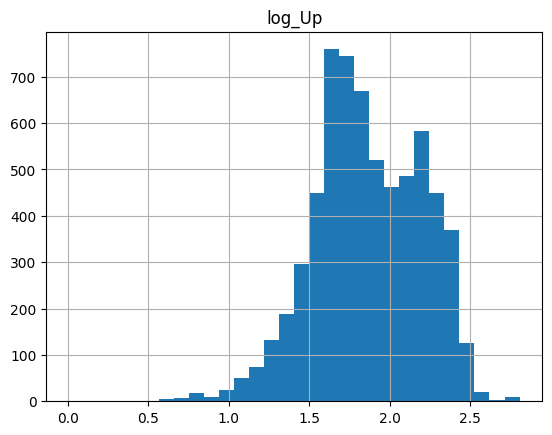

In [5]:
energy_subset.hist('log_Up', bins = 30)

In [6]:
def rec(m, n, tol):
    if not type(m) == 'numpy.ndarray':
        m = np.array(m) #change m to a np array
    if not type(n) == 'numpy.ndarray':
        n = np.array(n) #change n to a np array

    l = m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol: #constant get cancelled
            percent+=1
    return 100*(percent/l)

In [7]:
#Ridge

pipe = Pipeline([('scaler', StandardScaler()), ('lr', Ridge(alpha=1))])
pipe.fit(X_train, y_train)
y_pred_lr = pipe.predict(X_test)

print("RMSE for ridge regression (with scaling):", np.sqrt(np.mean((y_test-y_pred_lr)**2)))
np.mean(abs(y_test-y_pred_lr))

RMSE for ridge regression (with scaling): 0.39926667116677855


np.float64(0.31614078496607273)

In [8]:
energy['Up'].describe()

,Up
count,6456.000000
mean,92.938357
std,72.866377
min,-2.730000
25%,40.324395
50%,66.049997
75%,135.763118
max,635.400024


In [9]:
min(energy.Up)

-2.7300000190734863

In [10]:
#SVR

pipe_svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
pipe_svr.fit(X_train, y_train.ravel())
y_pred_svr = pipe_svr.predict(X_test)

rmse_svr = np.sqrt(np.mean((y_test.flatten() - y_pred_svr.flatten())**2))
print(f"RMSE for SVR (with scaling): {rmse_svr}")

RMSE for SVR (with scaling): 0.21427319243624424


In [11]:
#Random forest
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state=42))])
pipe_rf.fit(X_train, y_train.ravel())
y_pred_rf = pipe_rf.predict(X_test)

rmse_rf = np.sqrt(np.mean((y_test.flatten() - y_pred_rf.flatten())**2))
print(f"RMSE for Random Forest Regression (with scaling): {rmse_rf}")

RMSE for Random Forest Regression (with scaling): 0.19339060327777338


In [12]:
#MLP
pipe_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(random_state=42,hidden_layer_sizes=(100,50), max_iter=1000))])
pipe_mlp.fit(X_train, y_train.ravel()) # .ravel() to convert y_train to a 1D array
y_pred_mlp = pipe_mlp.predict(X_test)

rmse_mlp = np.sqrt(np.mean((y_test.flatten() - y_pred_mlp.flatten())**2))
print(f"RMSE for MLP Regressor (with scaling): {rmse_mlp}")

RMSE for MLP Regressor (with scaling): 0.20711467589538507


In [13]:
#kfold Ridge

data_idx = np.arange(len(X_train))

kf = KFold(n_splits=5)
k = 0
best_score = np.inf

for idx_train, idx_val in kf.split(data_idx):
    X_train_k = X_train[idx_train]
    y_train_k = y_train[idx_train]

    X_val = X_train[idx_val]
    y_val = y_train[idx_val]

    pipe = Pipeline([('scaler', StandardScaler()), ('lr', Ridge(alpha=1.0))])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    score = np.sqrt(np.mean((y_val-y_pred_lr)**2))
    print("fold ", k, ": RMSE for linear regression (with scaling):", score)
    k = k + 1

    if score < best_score:
        best_model = copy.deepcopy(pipe)
        best_score = score

#test the best model from cross validation:
y_pred_lr = best_model.predict(X_test)
score = np.sqrt(np.mean((y_test-y_pred_lr)**2))
print("RMSE for linear regression (with scaling):", score)

fold  0 : RMSE for linear regression (with scaling): 0.39121353223837074
fold  1 : RMSE for linear regression (with scaling): 0.4101960295056454
fold  2 : RMSE for linear regression (with scaling): 0.4090621613154804
fold  3 : RMSE for linear regression (with scaling): 0.3810840961746204
fold  4 : RMSE for linear regression (with scaling): 0.41686841021450866
RMSE for linear regression (with scaling): 0.39953160779856706


In [14]:
#kfold SVR

kf = KFold(n_splits=5)
k = 0
best_score_svr = np.inf
best_svr_model = None

for idx_train, idx_val in kf.split(X_train):
    X_train_k = X_train[idx_train]
    y_train_k = y_train[idx_train]

    X_val = X_train[idx_val]
    y_val = y_train[idx_val]

    pipe_svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
    pipe_svr.fit(X_train_k, y_train_k.ravel())
    y_pred_svr_fold = pipe_svr.predict(X_val)

    score_svr = np.sqrt(np.mean((y_val.flatten() - y_pred_svr_fold.flatten())**2))
    print(f"fold {k}: RMSE for SVR (with scaling): {score_svr}")
    k = k + 1

    if score_svr < best_score_svr:
        best_svr_model = copy.deepcopy(pipe_svr)
        best_score_svr = score_svr

# Test the best SVR model from cross-validation:
y_pred_svr_best = best_svr_model.predict(X_test)
score_svr_test = np.sqrt(np.mean((y_test.flatten() - y_pred_svr_best.flatten())**2))
print(f"RMSE for best SVR model on test set: {score_svr_test}")

fold 0: RMSE for SVR (with scaling): 0.21579609401676605
fold 1: RMSE for SVR (with scaling): 0.21003049303979643
fold 2: RMSE for SVR (with scaling): 0.21525925117127237
fold 3: RMSE for SVR (with scaling): 0.2011422520445875
fold 4: RMSE for SVR (with scaling): 0.2149051796468144
RMSE for best SVR model on test set: 0.21517615659308534


In [15]:
#kfold Random forest

kf = KFold(n_splits=5)
k = 0
best_score_rf = np.inf
best_rf_model = None

for idx_train, idx_val in kf.split(X_train):
    X_train_k = X_train[idx_train]
    y_train_k = y_train[idx_train]

    X_val = X_train[idx_val]
    y_val = y_train[idx_val]

    pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state=42))])
    pipe_rf.fit(X_train_k, y_train_k.ravel())
    y_pred_rf_fold = pipe_rf.predict(X_val)

    score_rf = np.sqrt(np.mean((y_val.flatten() - y_pred_rf_fold.flatten())**2))
    print(f"fold {k}: RMSE for Random Forest (with scaling): {score_rf}")
    k = k + 1

    if score_rf < best_score_rf:
        best_rf_model = copy.deepcopy(pipe_rf)
        best_score_rf = score_rf

# Test the best Random Forest model from cross-validation:
y_pred_rf_best = best_rf_model.predict(X_test)
score_rf_test = np.sqrt(np.mean((y_test.flatten() - y_pred_rf_best.flatten())**2))
print(f"RMSE for best Random Forest model on test set: {score_rf_test}")

fold 0: RMSE for Random Forest (with scaling): 0.19892893423663904
fold 1: RMSE for Random Forest (with scaling): 0.18192877770465976
fold 2: RMSE for Random Forest (with scaling): 0.19076909708605577
fold 3: RMSE for Random Forest (with scaling): 0.18529510428251014
fold 4: RMSE for Random Forest (with scaling): 0.1912838628313974
RMSE for best Random Forest model on test set: 0.19739284884552707


In [16]:
#kfold MLP

kf = KFold(n_splits=5)
k = 0
best_score_mlp = np.inf
best_mlp_model = None

for idx_train, idx_val in kf.split(X_train):
    X_train_k = X_train[idx_train]
    y_train_k = y_train[idx_train]

    X_val = X_train[idx_val]
    y_val = y_train[idx_val]

    pipe_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(random_state=42, hidden_layer_sizes=(100,50), max_iter=1000))])
    pipe_mlp.fit(X_train_k, y_train_k.ravel())
    y_pred_mlp_fold = pipe_mlp.predict(X_val)

    score_mlp = np.sqrt(np.mean((y_val.flatten() - y_pred_mlp_fold.flatten())**2))
    print(f"fold {k}: RMSE for MLP (with scaling): {score_mlp}")
    k = k + 1

    if score_mlp < best_score_mlp:
        best_mlp_model = copy.deepcopy(pipe_mlp)
        best_score_mlp = score_mlp

# Test the best MLP model from cross-validation:
y_pred_mlp_best = best_mlp_model.predict(X_test)
score_mlp_test = np.sqrt(np.mean((y_test.flatten() - y_pred_mlp_best.flatten())**2))
print(f"RMSE for best MLP model on test set: {score_mlp_test}")

fold 0: RMSE for MLP (with scaling): 0.2098475863692
fold 1: RMSE for MLP (with scaling): 0.20029297661638054
fold 2: RMSE for MLP (with scaling): 0.21472955238240007
fold 3: RMSE for MLP (with scaling): 0.20579048051624657
fold 4: RMSE for MLP (with scaling): 0.21287678135072677
RMSE for best MLP model on test set: 0.20945207577058952


In [17]:
print("\n--- Cross-Validation Results Summary ---")
print(f"Ridge Regression RMSE on test set: {score}")
print(f"SVR RMSE on test set: {score_svr_test}")
print(f"Random Forest Regression RMSE on test set: {score_rf_test}")
print(f"MLP Regressor RMSE on test set: {score_mlp_test}")


--- Cross-Validation Results Summary ---
Ridge Regression RMSE on test set: 0.39953160779856706
SVR RMSE on test set: 0.21517615659308534
Random Forest Regression RMSE on test set: 0.19739284884552707
MLP Regressor RMSE on test set: 0.20945207577058952


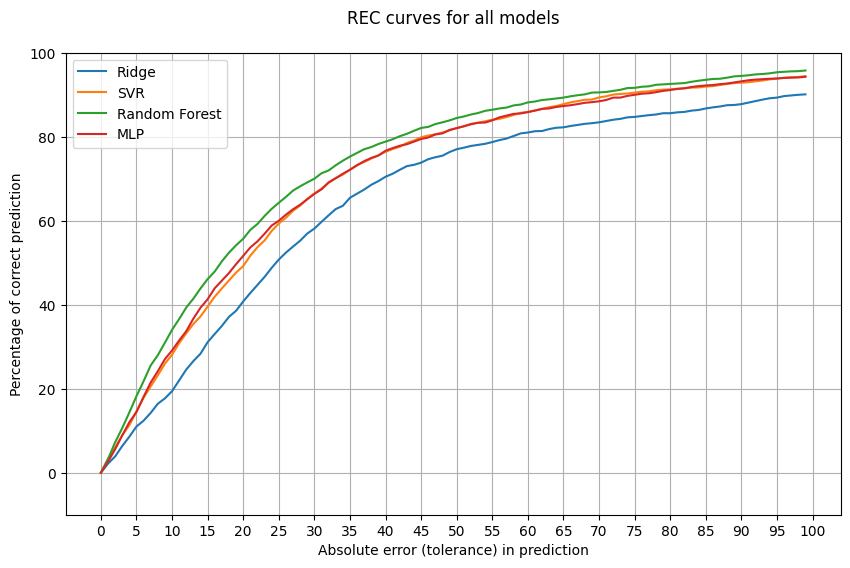

In [18]:
rec_rf = []
rec_mlp = []
rec_svr = []
rec_linear=[]
tol_max = 100
for i in range(tol_max):
    rec_linear.append(rec(y_pred_lr, y_test, i))
    rec_rf.append(rec(y_pred_rf, y_test, i))
    rec_mlp.append(rec(y_pred_mlp, y_test, i))
    rec_svr.append(rec(y_pred_svr, y_test, i))

plt.figure(figsize=(10, 6))
plt.title("REC curves for all models\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max // 5 + 1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max), rec_linear, label='Ridge')
plt.plot(range(tol_max), rec_svr, label='SVR')
plt.plot(range(tol_max), rec_rf, label='Random Forest')
plt.plot(range(tol_max), rec_mlp, label='MLP')

plt.legend()
plt.show()

### Scatter Plot of Ridge

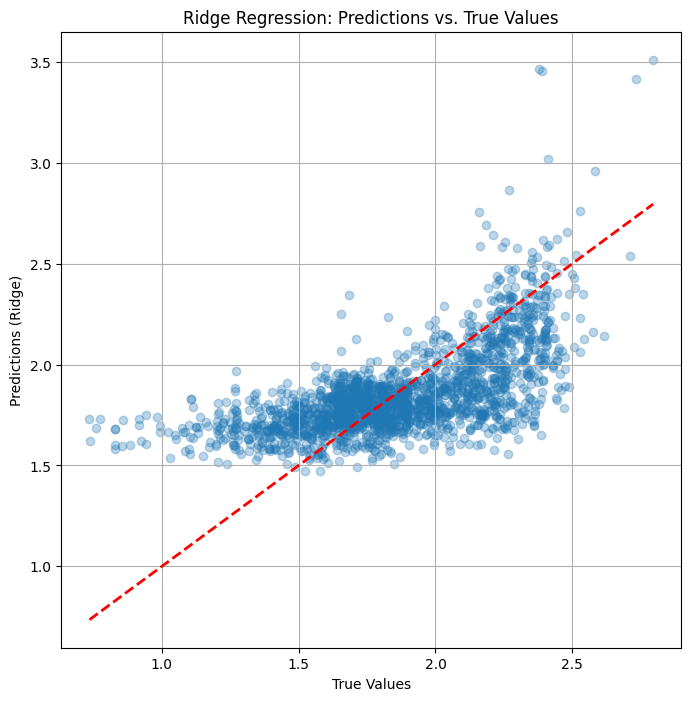

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions (Ridge)')
plt.title('Ridge Regression: Predictions vs. True Values')
plt.grid(True)
plt.show()

### Scatter Plot: SVR

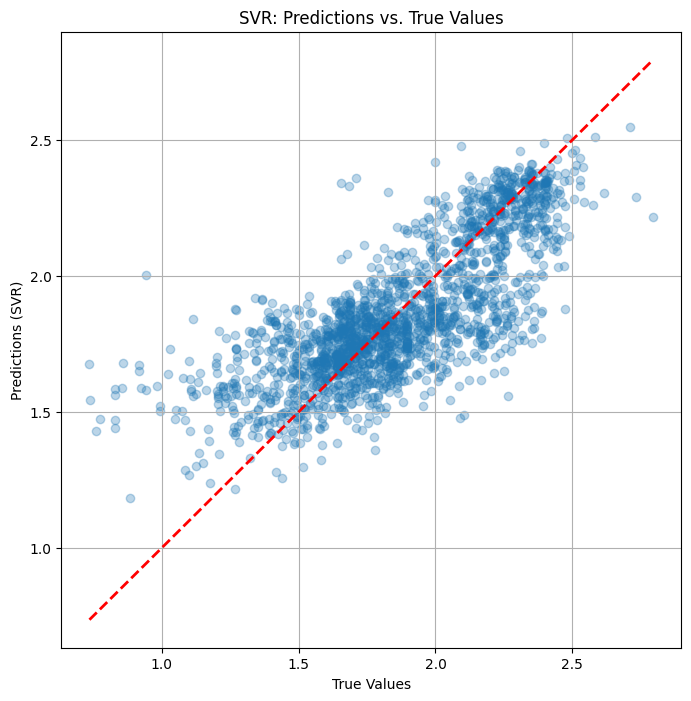

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svr_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions (SVR)')
plt.title('SVR: Predictions vs. True Values')
plt.grid(True)
plt.show()

### Scatter Plot: Random Forest

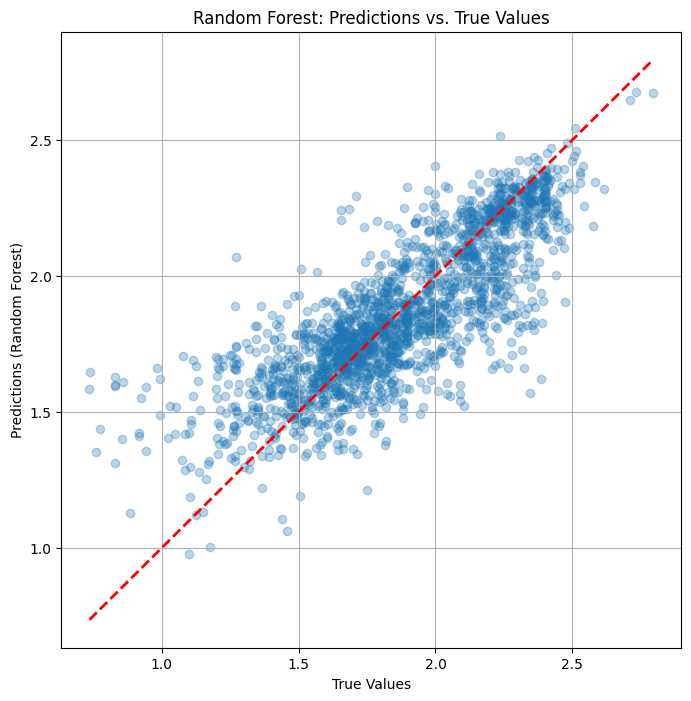

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions (Random Forest)')
plt.title('Random Forest: Predictions vs. True Values')
plt.grid(True)
plt.show()

### Scatter Plot: MLP Regressor

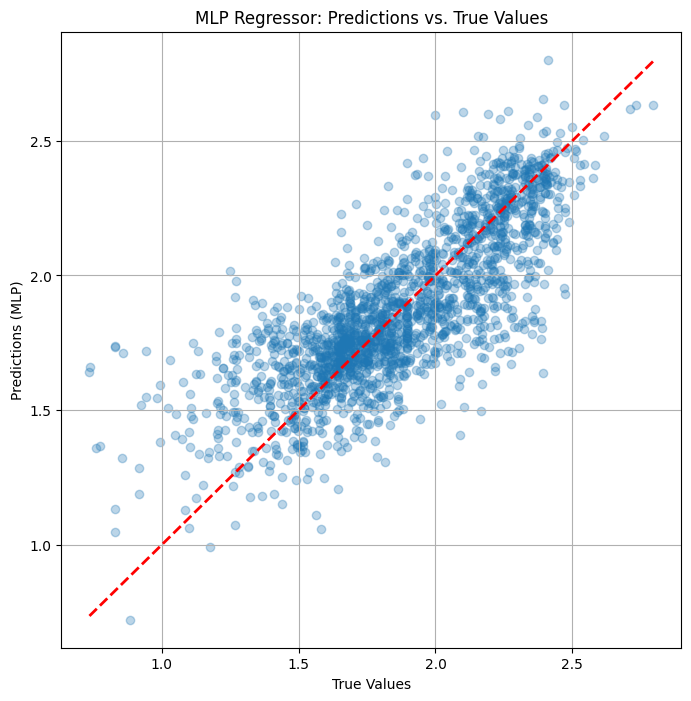

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_mlp_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions (MLP)')
plt.title('MLP Regressor: Predictions vs. True Values')
plt.grid(True)
plt.show()

In [23]:
feature_importances = best_rf_model.named_steps['rf'].feature_importances_
print("Feature Importances:", feature_importances)
feature_names = energy_subset.drop('log_Up', axis=1).columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
display(feature_importances_df)

Feature Importances: [0.55843972 0.04471592 0.03863704 0.01546795 0.07072436 0.08388231
 0.04271714 0.04929356 0.00278883 0.04987837 0.0434548 ]


,Feature,Importance
0,sp,0.558440
5,air_temperature,0.083882
4,pressure,0.070724
9,electricity_consumption,0.049878
7,wind_direction,0.049294
1,cloud_amount,0.044716
10,electricity_consumption_Finnish_networks,0.043455
6,relative_humidity,0.042717
2,wind_speed,0.038637
3,precipitation_amount,0.015468


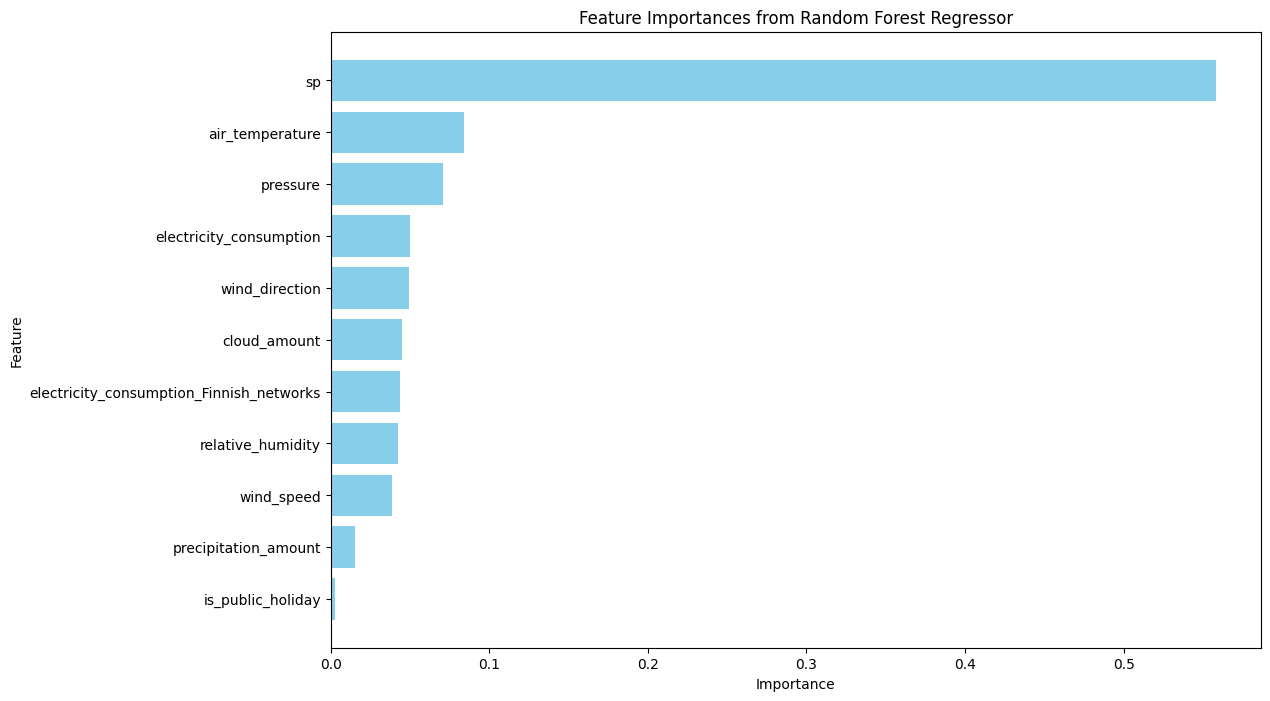

In [24]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regressor')
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature on top
plt.show()

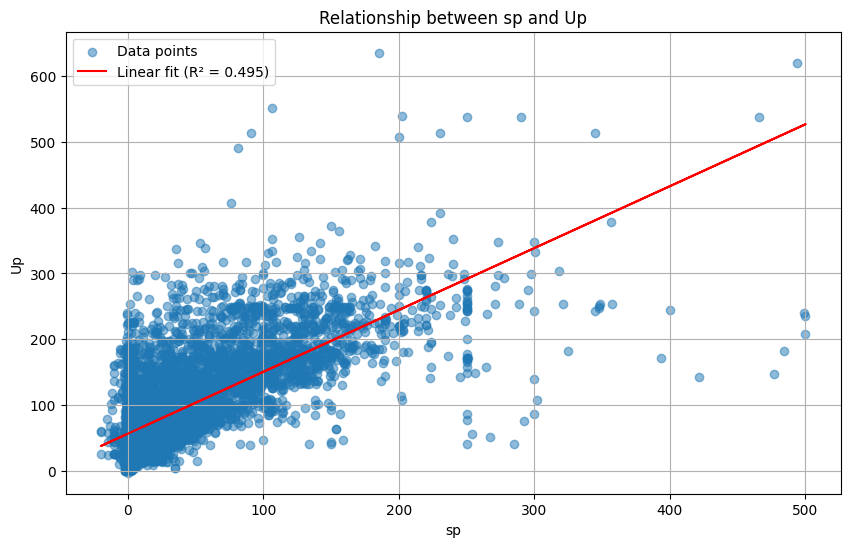

In [25]:
X = energy[['sp']]
y = energy['Up']
linmodel = LinearRegression()
linmodel.fit(X, y)
y_pred = linmodel.predict(X)
r2 = linmodel.score(X, y)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', label=f'Linear fit (R² = {r2:.3f})')

plt.xlabel('sp')
plt.ylabel('Up')
plt.title('Relationship between sp and Up')
plt.grid(True)
plt.legend()
plt.show()